# Victor Manuel Gómez Espinosa


# Librerias y funciones

In [1]:
import numpy as np

In [3]:
import pandas as pd

In [5]:
import statsmodels.api as sm 
from statsmodels.multivariate.manova import MANOVA
import pylab as py

In [6]:
from scipy import stats
# W,p_v=stats.shapiro(x) #p_v>0.2 or W>0.9 Normalidad univariada

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [4]:
import matplotlib.pyplot as plt

In [10]:
from yellowbrick.regressor import CooksDistance #outliers 1d

C:\Users\seema\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [13]:
from Formulas_mult import *

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error

# 1) Replicar resultados articulo

In [6]:
train=pd.read_csv('train.csv')
unique_m=pd.read_csv('unique_m.csv')

In [7]:
train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [8]:
# datos para el modelo
y=train.critical_temp.values
X=train.drop(columns=['critical_temp']).values

In [9]:
y=y.reshape(-1,1)

In [12]:
# modelo y prediccion
reg=LinearRegression()
reg.fit(X,y)
y_pred=reg.predict(X)

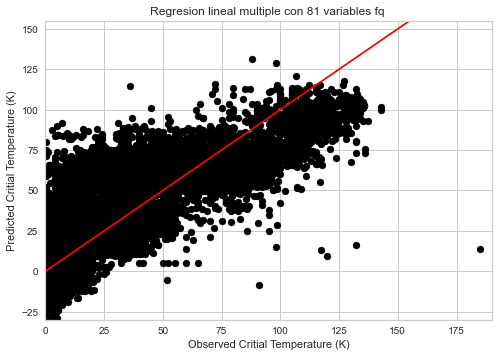

In [20]:
# Figura 8
xl=[0,200]
yl=[0,200]
#plt.figure(figsize = (15,10))
plt.plot(xl,yl, color='red')
plt.scatter(y,y_pred,color='black')
plt.xlim([0,190])
plt.ylim([-30,155])
plt.xlabel('Observed Critial Temperature (K)'), plt.ylabel('Predicted Critial Temperature (K)'), plt.title('Regresion lineal multiple con 81 variables fq ')
plt.show()


In [13]:
def OutofSampleRMSE(X,y):
    lmse=[]
    lr2=[]
    lmae=[]
    for i in range(25):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)
        # modelo y prediccion
        reg=LinearRegression()
        reg.fit(X_train,y_train)
        y_pred=reg.predict(X_test)
        mse=mean_squared_error(y_test,y_pred)
        r2=r2_score(y_test,y_pred)
        mae=median_absolute_error(y_test,y_pred)
        
        lmse.append(mse)
        lr2.append(r2)
        lmae.append(mae)
    
    mses=np.array(lmse)
    r2s=np.array(lr2)
    maes=np.array(lmae)
    
    msem=round(np.mean(mses),2)
    rmse=round(np.sqrt(msem),2)
    r2m=round(np.mean(r2s),2)
    maem=round(np.mean(maes),2)
    return(rmse,r2m,maem)

In [14]:
from datetime import datetime

startTime = datetime.now()
rmse,r2m,maem=OutofSampleRMSE(X,y)
print(datetime.now() - startTime)
print(rmse,r2m,maem)

0:00:01.635539
17.65 0.74 10.21


In [23]:
z=train.drop(columns=['critical_temp'])
z=sm.add_constant(z)
y=train.critical_temp

In [34]:
y.shape

(21263,)

In [24]:
mod=sm.OLS(y,z)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          critical_temp   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     733.8
Date:                Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                        10:21:38   Log-Likelihood:                -91100.
No. Observations:               21263   AIC:                         1.824e+05
Df Residuals:                   21181   BIC:                         1.830e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

colinealidad y muchas variables no son significativas

C:\Users\seema\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

C:\Users\seema\Anaconda3\lib\site-packages\yellowbrick\regressor\influence.py:183: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



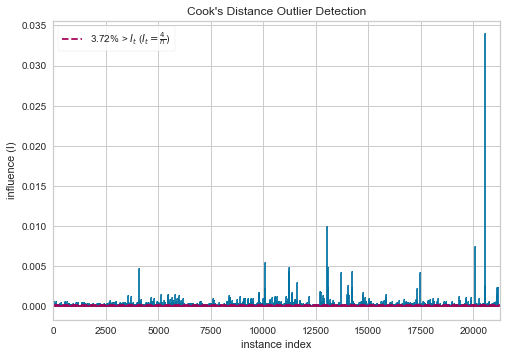

In [25]:
# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(z, y)
visualizer.show()

Hay muchos outliers

In [26]:
residuals=res.resid
betas=res.params
yg=z@betas

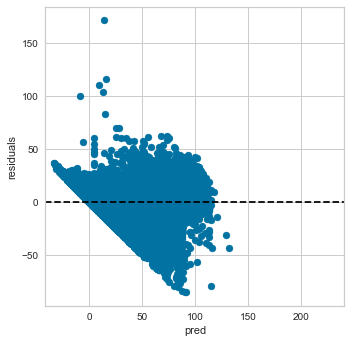

In [27]:
plt.scatter(yg,residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('residuals')
plt.xlabel('pred')
plt.axis('square')
plt.show()

la varianza no es constante

In [28]:
W,p_v=stats.shapiro(residuals) #p_v>0.2 or W>0.9 Normalidad univariada
print(W,p_v)

0.982059121131897 9.80908925027372e-45


C:\Users\seema\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



los residuales no siguen una distribucion normal univariada

In [29]:
from sklearn.decomposition import PCA

In [30]:
#estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
#PCA
n_comp = 6# numero de componentes
pca = PCA(n_comp)
pca.fit(X_scaled)


PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

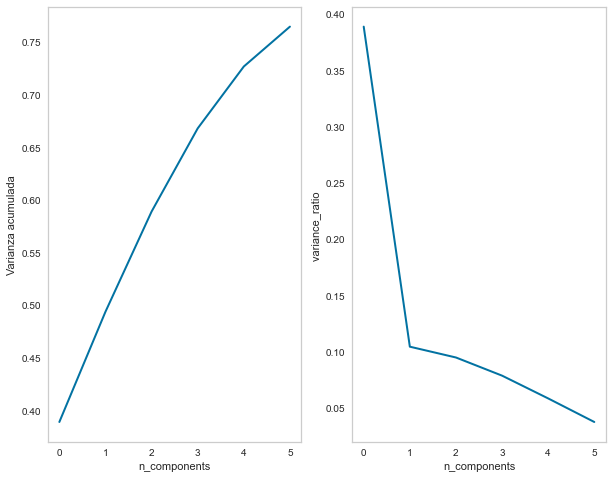

In [32]:
## varianza explicada
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
plt.grid(), plt.axis('tight'), plt.xlabel('n_components'), plt.ylabel('Varianza acumulada')

plt.subplot(1,2,2)
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.grid(), plt.axis('tight'), plt.xlabel('n_components'), plt.ylabel('variance_ratio ')
plt.show()

In [29]:
X_proj = pca.transform(X_scaled) 

In [30]:
# modelo y prediccion
reg=LinearRegression()
reg.fit(X_proj,y)
y_pred=reg.predict(X_proj)

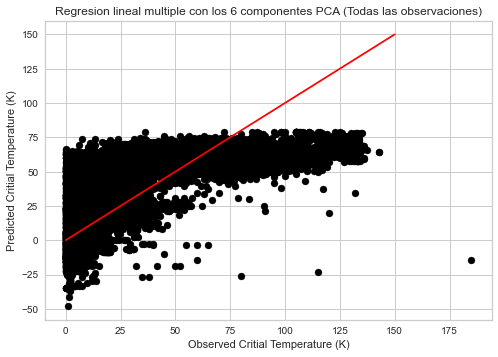

In [37]:
# Figura 8
xl=[0,150]
yl=[0,150]
#plt.figure(figsize = (15,10))
plt.plot(xl,yl, color='red')
plt.scatter(y,y_pred,color='black')
plt.xlabel('Observed Critial Temperature (K)'), plt.ylabel('Predicted Critial Temperature (K)'), plt.title('Regresion lineal multiple con los 6 componentes PCA (Todas las observaciones)')
plt.show()

In [32]:
rmse,r2m,maem=OutofSampleRMSE(X_proj,y)
print(rmse,r2m,maem)

22.63 0.56 15.52


para capturar el 80% de la informacion con 6 componentes es suficiente igual que con factores y el modelo de regresion lineal multiple tambien es muy similar